## Configs

In [1]:
import pandas as pd
import re
import numpy as np
import geopandas as gpd

from results_functions_general import reformat, joinkey

## Spatial join

In [2]:
districts = gpd.read_file('../geographies/cps_electoral_districts_2024.json')

In [4]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
pcts = gpd.read_file('../geographies/wardprecincts2022/WardPrecincts_2022_WardPrecinctKey.geojson')

In [6]:
pcts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [7]:
pcts = pcts.set_crs(4326, allow_override=True)

In [8]:
pcts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
union = pcts.overlay(districts, how='union')

In [10]:
union.head()

,ward_2022,precinct_1,FIRST_full,Shape_Leng,Shape_Area,Ward_Precinct,id,elec_dist,geometry
0,1.0,1.0,01001,0.024564,0.000026,1_1,3,3,"POLYGON ((-87.70522 41.92773, -87.70550 41.927..."
1,1.0,2.0,01002,0.032845,0.000035,1_2,3,3,"POLYGON ((-87.69752 41.92528, -87.69773 41.925..."
2,1.0,3.0,01003,0.035301,0.000044,1_3,3,3,"POLYGON ((-87.69627 41.92695, -87.69627 41.927..."
3,1.0,4.0,01004,0.023231,0.000028,1_4,3,3,"POLYGON ((-87.70164 41.92064, -87.70175 41.920..."
4,1.0,5.0,01005,0.024818,0.000029,1_5,3,3,"POLYGON ((-87.69722 41.91822, -87.69723 41.918..."


In [11]:
union['elec_dist'] = union['elec_dist'].astype(str)

In [12]:
union['ward_precinct_district'] = union['Ward_Precinct'] + '_' + union['elec_dist']

<AxesSubplot:>

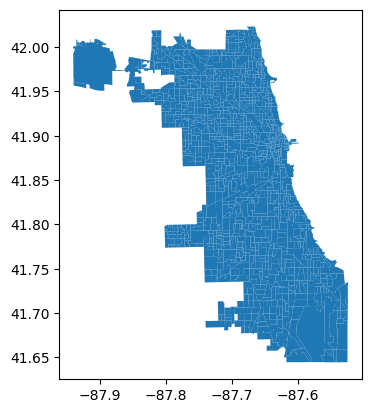

In [13]:
union.plot()

In [14]:
union.head()

,ward_2022,precinct_1,FIRST_full,Shape_Leng,Shape_Area,Ward_Precinct,id,elec_dist,geometry,ward_precinct_district
0,1.0,1.0,01001,0.024564,0.000026,1_1,3,3,"POLYGON ((-87.70522 41.92773, -87.70550 41.927...",1_1_3
1,1.0,2.0,01002,0.032845,0.000035,1_2,3,3,"POLYGON ((-87.69752 41.92528, -87.69773 41.925...",1_2_3
2,1.0,3.0,01003,0.035301,0.000044,1_3,3,3,"POLYGON ((-87.69627 41.92695, -87.69627 41.927...",1_3_3
3,1.0,4.0,01004,0.023231,0.000028,1_4,3,3,"POLYGON ((-87.70164 41.92064, -87.70175 41.920...",1_4_3
4,1.0,5.0,01005,0.024818,0.000029,1_5,3,3,"POLYGON ((-87.69722 41.91822, -87.69723 41.918...",1_5_3


In [15]:
union.to_file('precincts_districts_union.geojson', driver='GeoJSON')

## Load CPS results data

In [238]:
# load all districts
df1 = pd.read_csv('source/cps_1_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'custer',
             'custer_pct', 'pierre', 'pierre_pct'))

df2 = pd.read_csv('source/cps_2_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'deberry',
             'deberry_pct', 'hooper', 'hooper_pct', 'doyle', 'doyle_pct', 'leon', 'leon_pct'))

df3 = pd.read_csv('source/cps_3_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'rivas',
             'rivas_pct', 'dones', 'dones_pct'))

df4 = pd.read_csv('source/cps_4_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'zaccor',
             'zaccor_pct', 'rosenfeld', 'rosenfeld_pct', 'brown', 'brown_pct', 'day', 'day_pct', 'gioiosa', 'gioisa_pct', 'davis', 'davis_pct'))

df5 = pd.read_csv('source/cps_5_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'jitu',
             'jitu_pct'))

df6 = pd.read_csv('source/cps_6_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'biggs',
             'biggs_pct', 'thotakura', 'thotakura_pct', 'smith', 'smith_pct'))

df7 = pd.read_csv('source/cps_7_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'lopez',
             'lopez_pct', 'villalobos', 'villalobos_pct', 'don', 'don_pct'))

df8 = pd.read_csv('source/cps_8_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'gutierrez',
             'gutierrez_pct', 'ponce', 'ponce_pct'))

df9 = pd.read_csv('source/cps_9_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'boyle',
             'boyle_pct', 'thomas', 'thomas_pct', 'williams', 'williams_pct', 'lewis', 'lewis_pct'))

df10 = pd.read_csv('source/cps_10_11.7.csv', skiprows=2, names=('precinct', 'total_voters', 'parrot',
             'parrot_pct', 'smith', 'smith_pct', 'norrington', 'norrington_pct', 'jones', 'jones_pct'))

In [239]:
# format all districts

# 1
df1 = reformat(df1)
df1 = joinkey(df1)
df1['ward_precinct_district'] = df1['ward_precinct'] + '_' + '1' # add key
df1 = df1.drop(['precinct','ward', 'ward_precinct'], axis=1) # drop non-vote cols except ward_precinct_key
df1 = df1[df1.columns.drop(list(df1.filter(regex='pct')))] # drop pct cols
df1[['total_voters','custer','pierre']] = df1[['total_voters','custer','pierre']].apply(pd.to_numeric, errors='coerce') # convert to int

# 2
df2 = reformat(df2)
df2 = joinkey(df2)
df2['ward_precinct_district'] = df2['ward_precinct'] + '_' + '2' # add key
df2 = df2.drop(['precinct','ward', 'ward_precinct'], axis=1) 
df2 = df2[df2.columns.drop(list(df2.filter(regex='pct')))] 
df2[['total_voters','deberry','hooper','doyle','leon']] = df2[['total_voters','deberry','hooper','doyle','leon']].apply(pd.to_numeric, errors='coerce') # change

# 3
df3 = reformat(df3)
df3 = joinkey(df3)
df3['ward_precinct_district'] = df3['ward_precinct'] + '_' + '3' # add key
df3 = df3.drop(['precinct','ward', 'ward_precinct'], axis=1) 
df3 = df3[df3.columns.drop(list(df3.filter(regex='pct')))] 
df3[['total_voters','rivas','dones']] = df3[['total_voters','rivas','dones']].apply(pd.to_numeric, errors='coerce') # change

# 4
df4 = reformat(df4)
df4 = joinkey(df4)
df4['ward_precinct_district'] = df4['ward_precinct'] + '_' + '4' # add key
df4 = df4.drop(['precinct','ward', 'ward_precinct'], axis=1) 
df4 = df4[df4.columns.drop(list(df4.filter(regex='pct')))] 
df4[['total_voters','zaccor','rosenfeld','brown','day','gioiosa','davis']] = df4[['total_voters','zaccor','rosenfeld','brown','day','gioiosa','davis']].apply(pd.to_numeric, errors='coerce') # change

# 5
df5 = reformat(df5)
df5 = joinkey(df5)
df5['ward_precinct_district'] = df5['ward_precinct'] + '_' + '5' # add key
df5 = df5.drop(['precinct','ward', 'ward_precinct'], axis=1) 
df5 = df5[df5.columns.drop(list(df5.filter(regex='pct')))] 
df5[['total_voters','jitu']] = df5[['total_voters','jitu']].apply(pd.to_numeric, errors='coerce') # change

# 6
df6 = reformat(df6)
df6 = joinkey(df6)
df6['ward_precinct_district'] = df6['ward_precinct'] + '_' + '6' # add key
df6 = df6.drop(['precinct','ward', 'ward_precinct'], axis=1) 
df6 = df6[df6.columns.drop(list(df6.filter(regex='pct')))] 
df6[['total_voters','biggs','thotakura','smith']] = df6[['total_voters','biggs','thotakura','smith']].apply(pd.to_numeric, errors='coerce') # change

# 7
df7 = reformat(df7)
df7 = joinkey(df7)
df7['ward_precinct_district'] = df7['ward_precinct'] + '_' + '7' # add key
df7 = df7.drop(['precinct','ward', 'ward_precinct'], axis=1) 
df7 = df7[df7.columns.drop(list(df7.filter(regex='pct')))] 
df7[['total_voters','lopez','villalobos','don']] = df7[['total_voters','lopez','villalobos','don']].apply(pd.to_numeric, errors='coerce') # change

# 8
df8 = reformat(df8)
df8 = joinkey(df8)
df8['ward_precinct_district'] = df8['ward_precinct'] + '_' + '8' # add key
df8 = df8.drop(['precinct','ward', 'ward_precinct'], axis=1) 
df8 = df8[df8.columns.drop(list(df8.filter(regex='pct')))] 
df8[['total_voters','gutierrez','ponce']] = df8[['total_voters','gutierrez','ponce']].apply(pd.to_numeric, errors='coerce') # change

# 9
df9 = reformat(df9)
df9 = joinkey(df9)
df9['ward_precinct_district'] = df9['ward_precinct'] + '_' + '9' # add key
df9 = df9.drop(['precinct','ward', 'ward_precinct'], axis=1) 
df9 = df9[df9.columns.drop(list(df9.filter(regex='pct')))] 
df9[['total_voters','boyle','thomas', 'williams','lewis']] = df9[['total_voters','boyle','thomas', 'williams','lewis']].apply(pd.to_numeric, errors='coerce') # change

# 10
df10 = reformat(df10)
df10 = joinkey(df10)
df10['ward_precinct_district'] = df10['ward_precinct'] + '_' + '10'
df10 = df10.drop(['precinct','ward', 'ward_precinct'], axis=1) #
df10 = df10[df10.columns.drop(list(df10.filter(regex='pct')))] 
df10[['total_voters','parrot','smith','norrington','jones']] = df10[['total_voters','parrot','smith','norrington','jones']].apply(pd.to_numeric, errors='coerce') 

In [240]:
def get_leading_candidate(df,district):
    '''
    takes a district df and a district number
    adds a column for the top vote getter in each precinct
    returns the district df
    '''
    col_name = 'first_' + str(district)
    df[col_name] = ''
    col_name_2 = 'second_' + str(district)
    df[col_name_2] = ''
    
    for index, row in df.iloc[ : ,1:-3].iterrows(): # only candidate cols
        if row.sum() == 0: # exclude rows w no data
            pass
        else:
            # find candidate w max votes
            max_cand = row.idxmax()
            # assign max candidate to the new columns
            df.at[index,col_name] = max_cand

            # find second highest candidate 
            # create a temp row that excludes the max
            temp_row = row.drop(max_cand)
            # find second max
            second_cand = temp_row.idxmax()
            # assign second cand to new col
            df.at[index, col_name_2] = second_cand
            
            # check there are no ties between first and second
            if df[max_cand][index] == df[second_cand][index]:
                df.at[index,col_name] = 'Tie'

    return df

In [222]:
df5.head()

,total_voters,jitu,ward_precinct_district,first_5,second_5
3,194,194,1_13_5,jitu,
4,121,121,1_15_5,,
5,458,458,1_16_5,,
6,501,501,1_22_5,,
7,184,184,1_23_5,,


In [241]:
# find top vote getter for each district
df1 = get_leading_candidate(df1,1)
df2 = get_leading_candidate(df2,2)
df3 = get_leading_candidate(df3,3)
df4 = get_leading_candidate(df4,4)
# df5 = get_leading_candidate(df5,5) HANDLE MANUALLY BC ONLY 1
df6 = get_leading_candidate(df6,6)
df7 = get_leading_candidate(df7,7)
df8 = get_leading_candidate(df8,8)
df9 = get_leading_candidate(df9,9)
df10 = get_leading_candidate(df10,10)

In [242]:
# manually assign district 5
df5['first_5'] = 'jitu'
df5['second_5'] = 'jitu'

In [243]:
union_test = union.merge(df1[['ward_precinct_district','first_1']], on='ward_precinct_district', how='left')
union_test = union_test.merge(df2[['ward_precinct_district','first_2']], on='ward_precinct_district', how='left')
union_test = union_test.merge(df3[['ward_precinct_district','first_3']], on='ward_precinct_district', how='left')
union_test = union_test.merge(df4[['ward_precinct_district','first_4']], on='ward_precinct_district', how='left')
union_test = union_test.merge(df5[['ward_precinct_district','first_5']], on='ward_precinct_district', how='left')
union_test = union_test.merge(df6[['ward_precinct_district','first_6']], on='ward_precinct_district', how='left')
union_test = union_test.merge(df7[['ward_precinct_district','first_7']], on='ward_precinct_district', how='left')
union_test = union_test.merge(df8[['ward_precinct_district','first_8']], on='ward_precinct_district', how='left')
union_test = union_test.merge(df9[['ward_precinct_district','first_9']], on='ward_precinct_district', how='left')
union_test = union_test.merge(df10[['ward_precinct_district','first_10']], on='ward_precinct_district', how='left')

In [244]:
union_test.to_file('union_test.geojson', driver='GeoJSON')

In [247]:
union_test.iloc[:,9:].to_csv('processed/school_board_leaders_by_precinct.csv')

In [246]:
union_test.iloc[:,9:]

,ward_precinct_district,first_1,first_2,first_3,first_4,first_5,first_6,first_7,first_8,first_9,first_10
0,1_1_3,NaN,NaN,dones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1_2_3,NaN,NaN,dones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1_3_3,NaN,NaN,dones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1_4_3,NaN,NaN,dones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1_5_3,NaN,NaN,dones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
union_test = union.merge(df1, on='ward_precinct_district', how='left')
union_test = union_test.merge(df2, on='ward_precinct_district', how='left')
union_test = union_test.merge(df3, on='ward_precinct_district', how='left')
union_test = union_test.merge(df4, on='ward_precinct_district', how='left')
union_test = union_test.merge(df5, on='ward_precinct_district', how='left')
union_test = union_test.merge(df6, on='ward_precinct_district', how='left')
union_test = union_test.merge(df7, on='ward_precinct_district', how='left')
union_test = union_test.merge(df8, on='ward_precinct_district', how='left')
union_test = union_test.merge(df9, on='ward_precinct_district', how='left')
union_test = union_test.merge(df10, on='ward_precinct_district', how='left')

/home/aqin/Documents/stories/lib/python3.10/site-packages/geopandas/geodataframe.py:1470: FutureWarning: Passing 'suffixes' which cause duplicate columns {'total_voters_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)
/home/aqin/Documents/stories/lib/python3.10/site-packages/geopandas/geodataframe.py:1470: FutureWarning: Passing 'suffixes' which cause duplicate columns {'total_voters_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)
/home/aqin/Documents/stories/lib/python3.10/site-packages/geopandas/geodataframe.py:1470: FutureWarning: Passing 'suffixes' which cause duplicate columns {'total_voters_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)
/home/aqin/Documents/stories/lib/python3.10/site-packages/geopandas/geodataframe.py:1470: FutureWarn

In [251]:
union_test.columns

Index(['ward_2022', 'precinct_1', 'FIRST_full', 'Shape_Leng', 'Shape_Area',
       'Ward_Precinct', 'id', 'elec_dist', 'geometry',
       'ward_precinct_district', 'total_voters_x', 'custer', 'pierre',
       'first_1', 'second_1', 'total_voters_y', 'deberry', 'hooper', 'doyle',
       'leon', 'first_2', 'second_2', 'total_voters_x', 'rivas', 'dones',
       'first_3', 'second_3', 'total_voters_y', 'zaccor', 'rosenfeld', 'brown',
       'day', 'gioiosa', 'davis', 'first_4', 'second_4', 'total_voters_x',
       'jitu', 'first_5', 'second_5', 'total_voters_y', 'biggs', 'thotakura',
       'smith_x', 'first_6', 'second_6', 'total_voters_x', 'lopez',
       'villalobos', 'don', 'first_7', 'second_7', 'total_voters_y',
       'gutierrez', 'ponce', 'first_8', 'second_8', 'total_voters_x', 'boyle',
       'thomas', 'williams', 'lewis', 'first_9', 'second_9', 'total_voters_y',
       'parrot', 'smith_y', 'norrington', 'jones', 'first_10', 'second_10'],
      dtype='object')

In [257]:
# check
df3['dones'].sum()

28905

In [255]:
union_test.to_csv('test.csv')

In [261]:
union_test['biggs'].sum()

34954.0

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1734    0.0
1735    0.0
1736    0.0
1737    0.0
1738    0.0
Length: 1739, dtype: float64